# data cleaning
The main data cleaning task is related with missing values. The typical reasons why data are missing can be someone who forgot to fill in a field, transferring them from a legacy database, a programming error or simply a user chosen not to fill a field tied to his belief about the interpretation and use of the data. These sources are just simple random mistakes. In our dataset there are some unknown filled values. We know that Pandas will recognise “NA” as a missing value, but what about the others? If there’s multiple users manually entering data, then this is a common problem. Maybe I like to use “n/a” but you like to use “unknown”. We will also drop columns that are not used like, US DVD Sales, MPAA Rating , etc. We will then turn the "Worldwide Gross" column into a numeric type so pandas can make a histogram out of it. We will also remove all NaN rows and re-index the dataframe. This is done specifically for computing the p-value thought the stats.pearsonr method that does not support NaNs and infinities.

In [1]:
import matplotlib.pyplot as plt
import numpy.ma as ma
import pandas as pd
import numpy as np
import math 
from scipy import stats
%matplotlib inline


missing_values = ["n/a", "na", "--","unknown","Unknown","0"]

movie_data = pd.read_csv("movies.csv",na_values = missing_values)

to_drop =['US DVD Sales',
         'MPAA Rating',
         'Running Time (min)',
         'Distributor',
         'Source',
         'Creative Type']

new_names =  {'Worldwide Gross': 'w_gross',
             'Production Budget':'p_budget',
             'Major Genre': 'm_genre',
             'IMDB Votes':'imdb_votes',
             'IMDB Rating':'imdb_rating',
             'Rotten Tomatoes Rating': 'tomatoes',
             'US Gross': 'us_gross',
             'Release Date': 'r_date'}


#drop unnecessary columns
movie_data.drop(to_drop, inplace=True, axis=1)

#remove all NaN rows and re-index the dataframe
#this is done specifically for computing the p-value through the stats.pearsonr method
#that does not support NaNs and infinities.

movie_data = movie_data.dropna()
movie_data = movie_data.reset_index(drop=True)


#rename columns, some commands cant handle variables with spaces
movie_data.rename(columns=new_names, inplace=True)

#transform strings to numeric
movie_data["w_gross"] = pd.to_numeric(movie_data["w_gross"])


# plotting the histograms
By plotting the first graphs we can see that there is a clear correlation between the Worldwide Gross and the number of IMDB Votes as they clearly follow a geometric distribution.


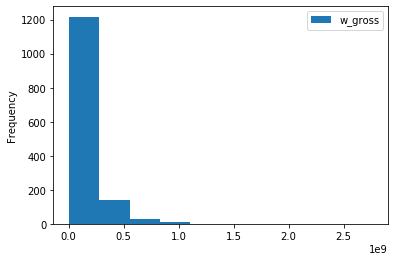

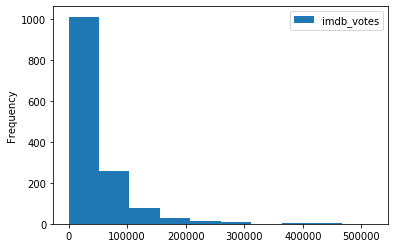

In [2]:
movie_data.plot.hist(y='w_gross') 
movie_data.plot.hist(y='imdb_votes')


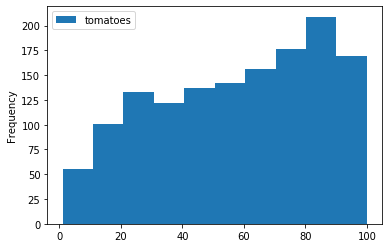

In [3]:
movie_data.plot.hist(y='tomatoes')

The "Rotten tomatoes rating" somehow resembles a uniform distribution with a peak and at the value 90 and a bottom at value 10. The "IMDB rating" follows a left-skewed distribution. The mean is to the left of the peak. This is the main definition behind “skewness”, which is technically a measure of the distribution of values around the mean.


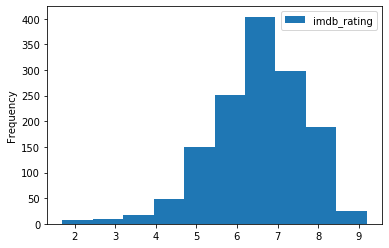

In [4]:
movie_data.plot.hist(y='imdb_rating')


# counting the number of movies for every major genre
Its clear that the most popular genres are drama and comedy.


Drama                  392
Comedy                 310
Action                 230
Adventure              134
Thriller/Suspense      127
Horror                  71
Romantic Comedy         68
Musical                 21
Western                 20
Black Comedy            19
Documentary              7
Concert/Performance      1
Name: m_genre, dtype: int64


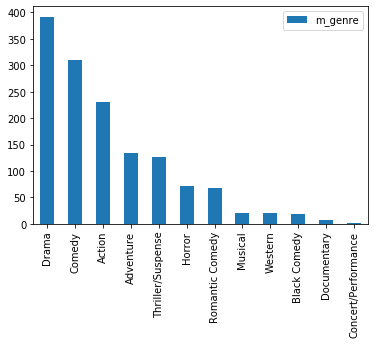

In [5]:
# Count unique values in column 'm_genre' of the dataframe
genres_count_values = movie_data['m_genre'].value_counts()

# Value table
print(genres_count_values)

# Make a pandas dataframe out of the pandas series
genres_count_dataframe = pd.DataFrame(genres_count_values)

# Plot the graph
genres_count_dataframe.plot.bar()


# log-log plot

We will define some bins with exponential increasing size. We will use the numpy.logspace that returns an evenly space logarithmic sequence of numbers. Using the min() function we can find where the minimum value lies and with log(max)/log(min) where the values will end. That is enough for the logspace input to generate exponential numbers.


minimum value of the imdb_votes:33.0
maximum value of the imdb_votes:519541.0
Exponential increasing bins to include the data range: [33.0, 33.0, 66.0, 132.0, 264.0, 528.0, 1056.0, 2112.0, 4224.0, 8448.0, 16896.0, 33792.0, 67584.0, 135168.0, 270336.0]


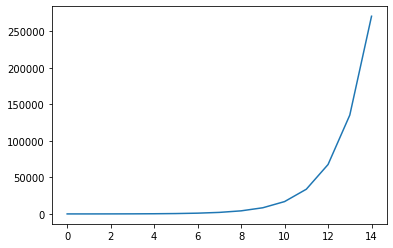

Mean values: [33, 49, 99, 198, 396, 792, 1584, 3168, 6336, 12672, 25344, 50688, 101376, 202752]


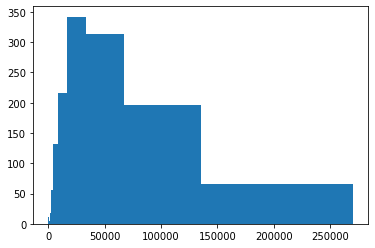

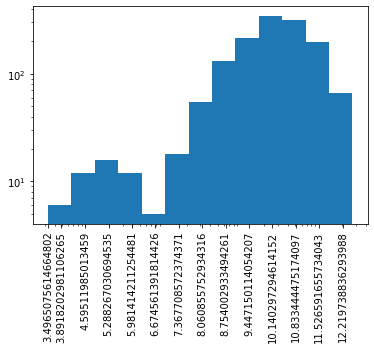

In [26]:
min_value_imdb_votes = movie_data['imdb_votes'].min()
max_value_imdb_votes = movie_data['imdb_votes'].max()

print('minimum value of the imdb_votes:'+str(min_value_imdb_votes))
print('maximum value of the imdb_votes:'+str(max_value_imdb_votes))

#generate sequence of exponentially increasing numbers

product = min_value_imdb_votes
exponential_bins = [product]

while product < max_value_imdb_votes:
    exponential_bins.append(product)
    product = product*2    

exponential_bins = list(exponential_bins)

print('Exponential increasing bins to include the data range:',exponential_bins)
plt.plot(exponential_bins)
plt.show()

#empty list to hold the mean values
mean_values = []

#length of the list that holds the bin ranges
bin_ranges_list_length = len(exponential_bins)

#find the mean values of the bins
for i,obj in enumerate(exponential_bins):
    if i < (bin_ranges_list_length - 1):
    
        current = exponential_bins[i]
        next_ = exponential_bins[i + 1]
        
        mean_value_of_the_bin = ((current+next_)/2)
        mean_values.append(int(mean_value_of_the_bin))

        
exponential_bins = list(exponential_bins)
mean_values = list(mean_values)

print('Mean values:',mean_values)


#mean values as input for bucket limits
plt.hist(movie_data['imdb_votes'], bins=exponential_bins)
plt.show()
#in a log-log scale
plt.hist(movie_data['imdb_votes'], bins=exponential_bins)
plt.yscale('log')
plt.xscale('log')

plt.xticks(mean_values,[np.log(i) for i in mean_values], rotation='vertical')
plt.show()

## doing the same for the w_gross column

minimum value of the w_gross:20987.0
maximum value of the w_gross:2767891499.0
Exponential increasing bins to include the data range: [20987.0, 20987.0, 62961.0, 188883.0, 566649.0, 1699947.0, 5099841.0, 15299523.0, 45898569.0, 137695707.0, 413087121.0, 1239261363.0]


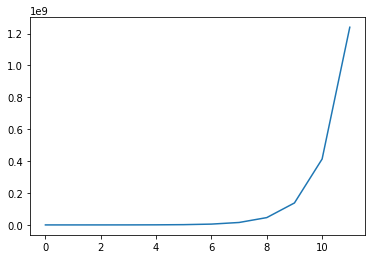

Mean values: [20987, 41974, 125922, 377766, 1133298, 3399894, 10199682, 30599046, 91797138, 275391414, 826174242]


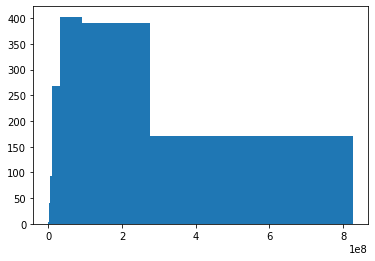

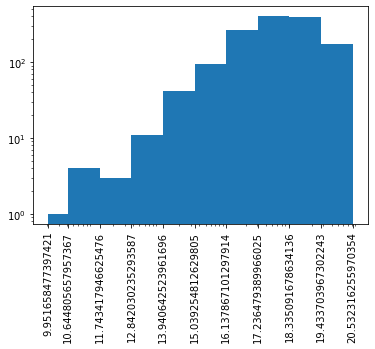

In [22]:
min_value_w_gross = movie_data['w_gross'].min()
max_value_w_gross = movie_data['w_gross'].max()

print('minimum value of the w_gross:'+str(min_value_w_gross))
print('maximum value of the w_gross:'+str(max_value_w_gross))

#generate sequence of exponentially increasing numbers


product = min_value_w_gross
exponential_bins = [product]

while product < max_value_w_gross:
    exponential_bins.append(product)
    product = product*3

exponential_bins = list(exponential_bins)

print('Exponential increasing bins to include the data range:',exponential_bins)
plt.plot(exponential_bins)
plt.show()

#empty list to hold the mean values
mean_values = []

#length of the list that holds the bin ranges
bin_ranges_list_length = len(exponential_bins)

#find the mean values of the bins
for i,obj in enumerate(exponential_bins):
    if i < (bin_ranges_list_length - 1):
    
        current = exponential_bins[i]
        next_ = exponential_bins[i + 1]
        
        mean_value_of_the_bin = ((current+next_)/2)
        mean_values.append(int(mean_value_of_the_bin))

        
mean_values = list(mean_values)
print('Mean values:',mean_values)

#mean values as input for bucket limits
plt.hist(movie_data['w_gross'], bins=mean_values)
plt.show()
#in a log-log scale
plt.hist(movie_data['w_gross'], bins=mean_values)
plt.yscale('log')
plt.xscale('log')
plt.xticks(mean_values,[np.log(i) for i in mean_values], rotation='vertical')
plt.show()

# scatter plot of w_gross and imdb_votes

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.plot(movie_data['w_gross'] ,movie_data['imdb_votes'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('gross')
ax.set_ylabel('imdb votes')

We can see that there is a direct correlation between those two columns. As the worldwide gross gets higher the IMDB votes also get higher.


# attributes correlation

In [ ]:
fig, ax = plt.subplots(3, 2)

#increase figure size
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(movie_data['w_gross'] ,movie_data['tomatoes'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[0, 0].set_xlabel('Worldwide Gross')
ax[0, 0].set_ylabel('Rotten Tomatoes Rating')
ax[0, 0].set_xscale('log')
ax[0, 0].set_yscale('log')

ax[1, 0].plot(movie_data['w_gross'] ,movie_data['imdb_rating'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[1, 0].set_xlabel('Worldwide Gross')
ax[1, 0].set_ylabel('IMDB Rating')
ax[1, 0].set_xscale('log')
ax[1, 0].set_yscale('log')

ax[2, 0].plot(movie_data['w_gross'] ,movie_data['imdb_votes'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[2, 0].set_xlabel('Worldwide Gross')
ax[2, 0].set_ylabel('IMDB Votes')
ax[2, 0].set_xscale('log')
ax[2, 0].set_yscale('log')

ax[0, 1].plot(movie_data['tomatoes'] ,movie_data['imdb_votes'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[0, 1].set_xlabel('Rotten Tomatoes Rating')
ax[0, 1].set_ylabel('IMDB Votes')
ax[0, 1].set_xscale('log')
ax[0, 1].set_yscale('log')

ax[1, 1].plot(movie_data['tomatoes'] ,movie_data['imdb_rating'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[1, 1].set_xlabel('Rotten Tomatoes Rating')
ax[1, 1].set_ylabel('IMDB Rating')
ax[0, 1].set_xscale('log')
ax[0, 1].set_yscale('log')

ax[2, 1].plot(movie_data['imdb_votes'] ,movie_data['imdb_rating'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[2, 1].set_xlabel('IMDB Votes')
ax[2, 1].set_ylabel('IMDB Rating')
ax[2, 1].set_xscale('log')
ax[2, 1].set_yscale('log')


plt.show()

1) As the worldwide gross get close to 10^8 the rotten tomatoes and imdb rating improves. 
2) There is a clear correlation between the worldwide gross and the number of imdb votes. 
3) There is a clear correlation between the imdb votes and the imdb rating, as the one gets higher the other one gets too. 
4) The same as above applies between the rotten tomatoes rating and the imdb rating.
5) When the imdb votes number gets higher so does the rotten tomatoes rating does.


## Pearson corelation
For example w_gross with US Gross have a corellation of 0.939742.
Lower values mean less correlation

In [ ]:
print(movie_data.corr(method='pearson'))

## Spearman corelation

In [ ]:
print(movie_data.corr(method='spearman'))

In [ ]:
numeric_columns = ['us_gross','w_gross','p_budget','tomatoes','imdb_rating','imdb_votes']
corr = []

p_values = pd.DataFrame()  # Matrix of p-values
for x in movie_data.columns:
    for y in movie_data.columns:
        #return pearson correlation coefficient and p-value for testing non-correlation
        if(x in numeric_columns and y in numeric_columns):
            corr = stats.pearsonr(movie_data[x], movie_data[y])
            p_values.loc[x,y] = corr[1]
print(p_values)

We know from a previous calculation that the least popular genres are the following:

    Musical                21
    Western                 20
    Black Comedy            19
    Documentary              7
    Concert/Performance      1


## Bar plots with Errors
At first we will choose the desired confidence interval.The most commonly used confidence levels are 90 percent, 95 percent and 99 percent. Then we will calculate the margin error Za/2 * σ/√(n). Where Za/2 the the confidence coefficient, a the confidence level, σ the standard deviation and n the sample size. 

To find the critical value, or Za/2 with a confidence level of 95% we will convert the percentage to a decimal, .95, and divide it by 2 to get .475. Then, we will check out the z table to find the corresponding value that goes with .475. We can see that the closest value is 1.96, at the intersection of row 1.9 and the column of .06

The final interval of the error is x̅ ± Za/2 * σ/√(n) where x̅ is the mean value 

In [ ]:
unique_genres = movie_data['m_genre'].unique()
not_popular_genres = ['Musical','Western','Black Comedy','Documentary','Concert/Performance']

popular_genres = list(filter(lambda x: x not in not_popular_genres, unique_genres))

#find the mean, count and std of the values
mean_values_dataframe = pd.DataFrame(movie_data.groupby('m_genre', as_index=False)['w_gross'].agg([np.mean, 'count', np.std]))

#reset the index from aggregating the mean, count and standard deviation
mean_values_dataframe = mean_values_dataframe.reset_index()

#drop unnecessary rows according to unpopular genres
mean_values_dataframe = mean_values_dataframe[~mean_values_dataframe['m_genre'].isin(not_popular_genres)]

print(mean_values_dataframe)

labels = popular_genres
x_pos = np.arange(len(labels))
mean_values = []
std_values = []
lower_error_list = []
upper_error_list = []

#for 95% confidence
confidence_value = 1.96

for x in popular_genres:
    row = mean_values_dataframe.loc[mean_values_dataframe['m_genre'] == x]
    mean = row.iloc[0]['mean']
    std = row.iloc[0]['std']
    sample_size = row.iloc[0]['count']
    mean_values.append(mean)
    std_values.append(std)
    
    lower = mean - confidence_value*(std/math.sqrt(sample_size))
    upper = mean + confidence_value*(std/math.sqrt(sample_size))
    
    lower_error_list.append(lower)
    upper_error_list.append(upper)
    
     
    

error_bars = [lower_error_list,upper_error_list]    

print("\nError bars values")
print("------------------------------")
print("0 is the lower, 1 is the upper")
print(pd.DataFrame(error_bars))

fig, ax = plt.subplots()
#yerr takes as input two a two size list that contains the upper and lower bounds of the error
ax.bar(x_pos, mean_values,
       yerr=error_bars,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)


ax.set_ylabel('Mean value')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels,rotation='vertical')
ax.yaxis.grid(True)
plt.show()


## T-testing
The t score is a ratio between the difference between two groups and the difference within the groups. The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. When runninG a t-test, the bigger the t-value, the more likely it is that the results are repeatable. Every t-value has a p-value to go with it. A p-value is the probability that the results from the sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05. Low p-values are good. They indicate that the data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results of the experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.


In [ ]:
for x,obj in enumerate(popular_genres):
    first_dataframe = movie_data[movie_data["m_genre"].str.contains(popular_genres[x])]
    first_array = first_dataframe['w_gross']
    for y,objj in enumerate(popular_genres):
        second_dataframe = movie_data[movie_data["m_genre"].str.contains(popular_genres[y])]
        second_array = second_dataframe['w_gross']

        
        t2, p2 = stats.ttest_ind(first_array.to_numpy(),second_array.to_numpy(),equal_var=False)
        print("--------------Comparing pairs ---------------")
        print(popular_genres[x]," t = " + str(t2))
        print(popular_genres[y]," p = " + str(p2))
 


## They stoped making good movies anymore!
(data ratings say thats true, but i think were biased over the 'old things are good' and nostalgia)

In [ ]:
movie_data['r_date'] = pd.to_datetime(movie_data['r_date'])

#groupby year and take the mean values
a1 = pd.DataFrame(movie_data.groupby(movie_data['r_date'].dt.strftime('%Y'))['imdb_rating'].mean())
a2 = pd.DataFrame(movie_data.groupby(movie_data['r_date'].dt.strftime('%Y'))['tomatoes'].mean())

y_averages = (a1.join(a2)).reset_index()
print(y_averages)


## It looks like movies in the future are going to be better!
We can see that values after 2010 are from the future. We're not going to need them. Also values before 1970 have sparse data for every decade. We will keep the years from 1970 to 2010.

In [ ]:
y_averages = y_averages.astype({"r_date": int})
y_averages = y_averages.drop(y_averages[(y_averages.r_date < 1970) | (y_averages.r_date > 2010)].index)
y_averages = y_averages.reset_index(drop=True)
y_averages = y_averages.set_index('r_date')

print(y_averages)

The cleaned series have no year in-between missing so we can computer the average decades by averaging every 10 rows into one.


In [ ]:
y_averages_10_yr = y_averages.set_index(np.arange(len(y_averages)) // 10).mean(level=0)

print(y_averages_10_yr)

print('\ntomatoes graph')
y_averages_10_yr['tomatoes'].plot.line()
plt.show()
print('imdb graph')
y_averages_10_yr['imdb_rating'].plot.line()

As we expected we have 4 decades from 1970 to 2010. According to the IMDB the rating of every decade has fallen about 0.72 in 4 decades. Thats not a big difference but according to the rotten tomatoes movie index the rating has fallen for about 30 units or 3 units in the IMDB scale. For the IMDB the numerical rating is based off of votes from users on a 1-10 star scale. The ratings are then normalized using a bayesian filtering formula that strips out "outlier" overly negative or positive ratings since IMDB has to deal with "spam" votes with it's open registration system. Rotten Tomatoes also offers user-voting, the "Tomatometer", the primary rating metric is a measure of the number of "FRESH" reviews as a percentage of overall reviews. The reviews counted into the Tomatometer is from a discrete list of selected critics/publications that remains uniform across the whole site (usually professional, but always prescreened based off of specific criteria including the requirement to have reviewed at least 100 films over the recent two years). With the saying that "they don’t make such good movies anymore" users are showing that they don’t agree with this according to their votes but the much more "professional" critics of the tomato index verify it according to our dataset.


## Make your own question about the data
Which of the top directors made the most profit? And If the amount of movies they make gets bigger does the profit rises? By saying top we can define it as the directors that made more than 10 movies.


In [23]:
directors = movie_data['Director'].unique()


director_counts = pd.DataFrame(movie_data['Director'].value_counts())

#find the mean, count and std of the values
director_values = pd.DataFrame(movie_data.groupby('Director')['w_gross'].agg([np.mean, 'count', np.sum]))

#reset the index from aggregating the mean, count and standard deviation
director_values = director_values.reset_index()

money_per_movie = []

#iterate over rows
for index, row in director_values.iterrows():
    money_per_movie.append(row['sum']/row['count'])

#add column to the dataframe
director_values['money_per_movie'] = money_per_movie

#drop all directors that made less than ten movies
director_values = director_values.astype({"count": int})
director_values = director_values.drop(director_values[director_values['count'] <= 10].index)
director_values = director_values.reset_index(drop=True)

#sort them by the money they made
director_values = director_values.sort_values(by=['money_per_movie'], ascending=False)

print(director_values)

           Director          mean  count           sum  money_per_movie
8  Steven Spielberg  3.382371e+08     17  5.750030e+09     3.382371e+08
6   Robert Zemeckis  3.199067e+08     11  3.518973e+09     3.199067e+08
5      Ridley Scott  1.843963e+08     12  2.212755e+09     1.843963e+08
4    Richard Donner  1.281672e+08     11  1.409839e+09     1.281672e+08
2   Joel Schumacher  1.181810e+08     12  1.418172e+09     1.181810e+08
3   Martin Scorsese  1.001857e+08     15  1.502785e+09     1.001857e+08
1    Clint Eastwood  9.065373e+07     11  9.971910e+08     9.065373e+07
0    Brian De Palma  4.127582e+07     11  4.540340e+08     4.127582e+07
9       Woody Allen  3.027158e+07     14  4.238022e+08     3.027158e+07
7         Spike Lee  2.898311e+07     15  4.347467e+08     2.898311e+07


We can see that the most money making director has also directed the most movies. That's not the case always because it is known that Steven Spielberg is one of the most successful directors of all time. For example despite the fact that Woody Allen and Spike Lee made more movies than Brian De Palma he managed to make more money per movie than them. 
